In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy import linalg

import sys
sys.path.insert(0,'..')
import specsens as ss

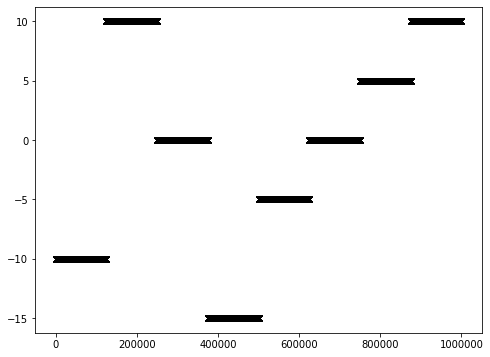

diff 20.0
diff -10.0
diff -15.0
diff 10.0
diff 5.0
diff 5.0
diff 5.0


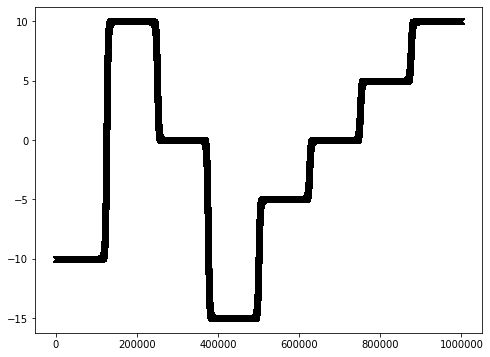

Signal power:      4.97 dB
Noise power:      -0.00 dB
SNR:               4.98 dB
Mean:              0.00 
Var:               1.00 
Num Samples:       1000000 


In [9]:
sample_freq = 1e6  # in Hz
length = 1.0  # in s
signal_strength = 0.0  # in dB
noise_strength = 0.0  # in dB

# wm = ss.WirelessMicrophone(f_sample=sample_freq,
#                            t_sec=length/2)  # either specify length in seconds
# # wm = ss.WirelessMicrophone(f_sample=sample_freq, num_samples=1e5) # or number of samples
# sig1 = wm.get_signal(f_center=1e5,
#                     f_deviation=15000,
#                     f_modulation=3900,
#                     dB=0)
# sig2 = wm.get_signal(f_center=1e5,
#                     f_deviation=15000,
#                     f_modulation=3900,
#                     dB=10)

db = [-10., 10., 0., -15., -5., 0., 5., 10.]
num_steps = len(db)
dBs = np.repeat(db, sample_freq // len(db))

plt.figure(figsize=(8, 6))
plt.plot(dBs, 'kx')
plt.show()

num_per_step = int(sample_freq / num_steps)
sec_len = int(num_per_step * 0.2)

for i in range(1, num_steps):
    sec = dBs[i * num_per_step - sec_len // 2:i * num_per_step +
              sec_len // 2]
    left = np.mean(sec[0:len(sec) // 2])
    right = np.mean(sec[len(sec) // 2:-1])
    diff = right - left
    print(f'diff {diff}')
    x = np.linspace(0, len(sec) - 1, len(sec))
    log = stats.logistic.cdf(x,
                             len(sec) / 2 - .5,
                             len(sec) * 1. / 15.) * diff + left
    # plt.figure(figsize=(8, 6))
    # plt.plot(x, sec, 'kx')
    # plt.plot(x, log, 'rx')
    # plt.show()
    dBs[i * num_per_step - sec_len // 2:(i) * num_per_step +
        sec_len // 2] = log


plt.figure(figsize=(8, 6))
plt.plot(dBs, 'kx')
plt.show()

wm = ss.WirelessMicrophone(f_sample=sample_freq,
                           t_sec=length)  # either specify length in seconds
# wm = ss.WirelessMicrophone(f_sample=sample_freq, num_samples=1e5) # or number of samples
sig = wm.get_signal(f_center=0e5,
                    f_deviation=15000,
                    f_modulation=3900,
                    dB=dBs)

# print('wm.f_sample:     %6.2f' % (wm.f_sample))
# print('wm.num_samples:  %9d' % (wm.num_samples))
# print('wm.t_sec:        %6.2f' % (wm.t_sec))

wgn = ss.WhiteGaussianNoise(f_sample=sample_freq,
                            t_sec=length)  # either specify length in seconds
# wgn = ss.WhiteGaussianNoise(f_sample=sample_freq, t_sec=length) # or number of samples
noise = wgn.get_signal(dB=noise_strength)

# print('wgn.f_sample:    %6.2f' % (wgn.f_sample))
# print('wgn.num_samples: %9d' % (wgn.num_samples))
# print('wgn.t_sec:       %6.2f' % (wgn.t_sec))

# assert wm.num_samples == wgn.num_samples
# num_samples = wm.num_samples
num_samples = wgn.num_samples

both = sig + noise  # create actual signal ('both') comprising of signal and additive white gaussian noise (AWGN)

print('Signal power:    %6.2f dB' % (ss.util.signal_power(sig, dB=True)))
print('Noise power:     %6.2f dB' % (ss.util.signal_power(noise, dB=True)))
print('SNR:             %6.2f dB' % (ss.util.snr(sig, noise, dB=True)))
print('Mean:            %6.2f ' % (np.abs(noise.mean())))
print('Var:             %6.2f ' % (np.abs(noise.var())))
print('Num Samples:     %9d ' % (num_samples))

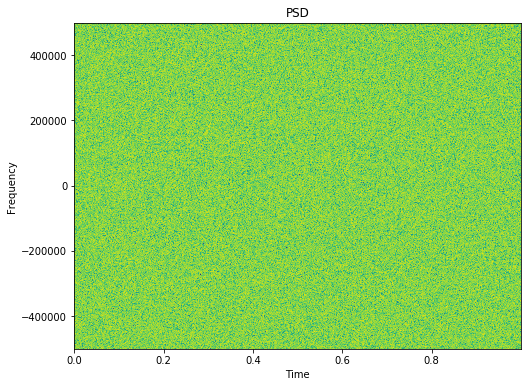

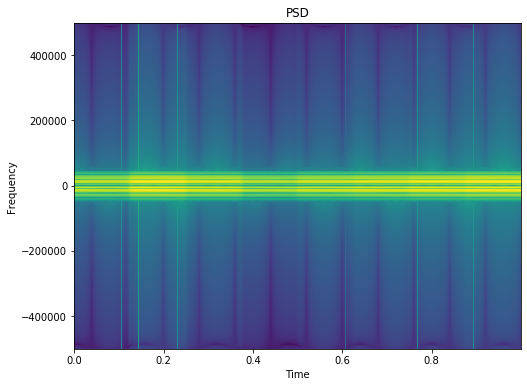

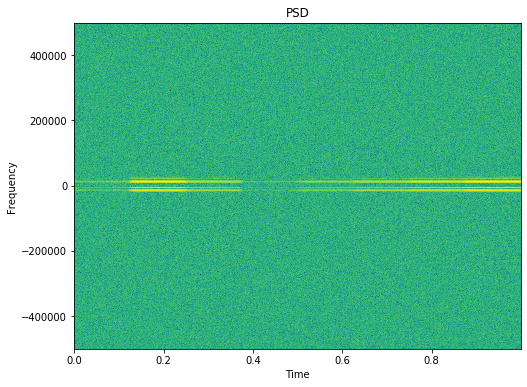

In [8]:
# Plot the resulting signals using matplotlib

plt.figure(figsize=(8, 6))
plt.specgram(noise,
             NFFT=1024,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('hann', 1024))
plt.title("PSD")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
plt.specgram(sig,
             NFFT=1024,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('hann', 1024))
plt.title("PSD")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
plt.specgram(both,
             NFFT=1024,
             Fs=sample_freq,
             scale='dB',
             cmap='viridis',
             noverlap=0,
             mode='psd',
             window=signal.get_window('hann', 1024))
plt.title("PSD")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# db = [-10., 10., 0., -15., -5., 0., 5., 10.]
# num_steps = len(db)
# dbs = np.repeat(db, sample_freq // len(db))

# plt.figure(figsize=(8, 6))
# plt.plot(dbs, 'kx')
# plt.show()

# num_per_step = l // num_steps
# sec_len = int(num_per_step * 0.1)

# for i in range(1, num_steps):
#     sec = dbs[i * num_per_step - sec_len // 2:(i) * num_per_step +
#               sec_len // 2]
#     left = np.mean(sec[0:len(sec) // 2])
#     right = np.mean(sec[len(sec) // 2:-1])
#     diff = right - left
#     print(f'diff {diff}')
#     x = np.linspace(0, len(sec) - 1, len(sec))
#     log = stats.logistic.cdf(x,
#                              len(sec) / 2 - .5,
#                              len(sec) * 1. / 15.) * diff + left
#     # plt.figure(figsize=(8, 6))
#     # plt.plot(x, sec, 'kx')
#     # plt.plot(x, log, 'rx')
#     # plt.show()
#     dbs[i * num_per_step - sec_len // 2:(i) * num_per_step +
#         sec_len // 2] = log


# plt.figure(figsize=(8, 6))
# plt.plot(dbs, 'kx')
# plt.show()
    
# sec = db_arr[(len(db_arr)-n)//2:(len(db_arr)+n)//2]
# assert n == len(sec)
# print(f'sec len {len(sec)}')

# left = np.mean(sec[0:len(sec)//2])
# right = np.mean(sec[len(sec)//2:-1])
# diff = right-left
# print(f'diff {diff}')

# x = np.linspace(0, len(sec)-1, len(sec))
# log = stats.logistic.cdf(x, len(sec)/2-.5, len(sec)*1./15.) * diff + left

# plt.figure(figsize=(8, 6))
# plt.plot(x, sec, 'kx')
# plt.plot(x, log, 'rx')
# plt.show()

# db_arr2 = np.copy(db_arr)
# db_arr2[(len(db_arr2)-n)//2:(len(db_arr2)+n)//2] = log

# # plt.figure(figsize=(8, 6))
# # plt.plot(db_arr2[(len(db_arr2)-n)//2:(len(db_arr2)+n)//2], 'kx')
# # plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(db_arr2, 'kx')
# plt.show()

# # sos = signal.bessel(100, 0.001, 'lp', output='sos')
# # filtered = signal.sosfilt(sos, db_arr)

# b, a = signal.butter(10, 0.1)
# filtered = signal.filtfilt(b, a, db_arr)

# plt.figure(figsize=(8, 6))
# plt.plot(filtered, 'kx')
# plt.show()

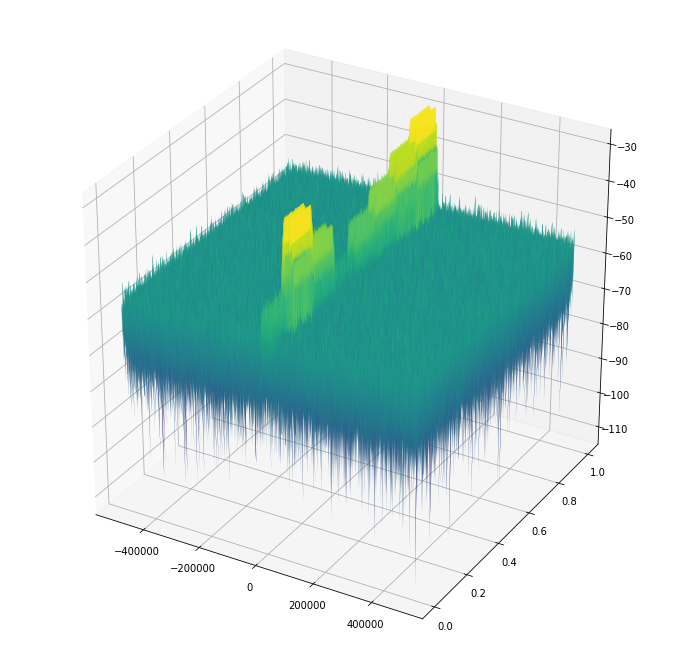

In [10]:
from scipy import fft
import scipy.ndimage
from mpl_toolkits import mplot3d as mpl3d
from matplotlib import cm

f, t, Sxx = signal.spectrogram(both,
                               sample_freq,
                               return_onesided=False,
                               window='hann',
                               nperseg=1024,
                               nfft=1024,
                               noverlap=0,
                               detrend=False,
                               scaling='density',
                               mode='psd')

f = fft.fftshift(f)
Sxx = fft.fftshift(Sxx, axes=0)

def clip_2d(x, lim_min, lim_max):
    (x, y) = np.shape(Sxx)
    for i in range(x):
        for j in range(y):
            Sxx[i, j] = max(min(Sxx[i, j], lim_max), lim_min)
    return Sxx


def smooth_2d(x, sigma):
    return scipy.ndimage.filters.gaussian_filter(x, [sigma, sigma],
                                                 mode='mirror')


def crop_2d(Sxx, f, t, n):
    Sxx = Sxx[n:-n, n:-n]
    f = f[n:-n]
    t = t[n:-n]
    return Sxx, f, t

Sxx = 10.0 * np.log10(Sxx)
# Sxx = clip_2d(Sxx, -60, 0)
# Sxx = smooth_2d(Sxx, 2)
# Sxx, f, t = crop_2d(Sxx, f, t, 4)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
# ax.get_proj = lambda: np.dot(mpl3d.axes3d.Axes3D.get_proj(ax), np.diag([1, 1, 0.5, 1]))
ax.plot_surface(f[:, None],
                t[None, :],
                Sxx,
                cmap='viridis',
                rstride=1,
                cstride=1,
                alpha=1,
                antialiased=True)
ax.view_init(elev=30, azim=-60)
plt.show()
# plt.savefig('test.png')

In [ ]:
dbs = [0., 10., -10., 0.]
db_arr = np.repeat(dbs, 1e6//len(dbs))
plt.figure(figsize=(8, 6))
plt.plot(db_arr, 'kx')
plt.show()

# sos = signal.bessel(10, 10, 'lp', fs=1000, analog=False, output='sos')

# sos = signal.bessel(100, 0.001, 'lp', output='sos')
# filtered = signal.sosfilt(sos, db_arr)

b, a = signal.butter(10, 0.1)
filtered = signal.filtfilt(b, a, db_arr)

plt.figure(figsize=(8, 6))
plt.plot(filtered, 'kx')
plt.show()